In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.ensemble import *
from sklearn.model_selection import *
from sklearn.metrics import *

In [34]:
train_ori = pd.read_csv(r'C:\Users\logic\Documents\datascience\train.csv')
test_ori = pd.read_csv(r'C:\Users\logic\Documents\datascience\test.csv')
submission = pd.read_csv(r'C:\Users\logic\Documents\datascience\sample_submission.csv')
display(train_ori, test_ori)

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8
...,...,...,...,...,...,...,...,...,...,...,...,...
7106,2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.3,5.1,191.1
7107,2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.4,5.8,221.3
7108,2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.6,5.2,227.4
7109,2010-12-31 23:00:00,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,1.5,4.6,199.8


,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3
...,...,...,...,...,...,...,...,...,...
2242,2011-04-04 10:00:00,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8
2243,2011-04-04 11:00:00,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0
2244,2011-04-04 12:00:00,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1
2245,2011-04-04 13:00:00,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5


# Categorization of columns into feature and Target based on project description

In [59]:
train_ori.columns

Index(['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'],
      dtype='object')

In [31]:
target_col = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']
feature_col = ['deg_C', 'relative_humidity', 'absolute_humidity','sensor_1', 'sensor_2','sensor_3','sensor_4','sensor_5']
discrete_col = ['deg_C', 'relative_humidity', 'absolute_humidity']
continous_col = ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5']

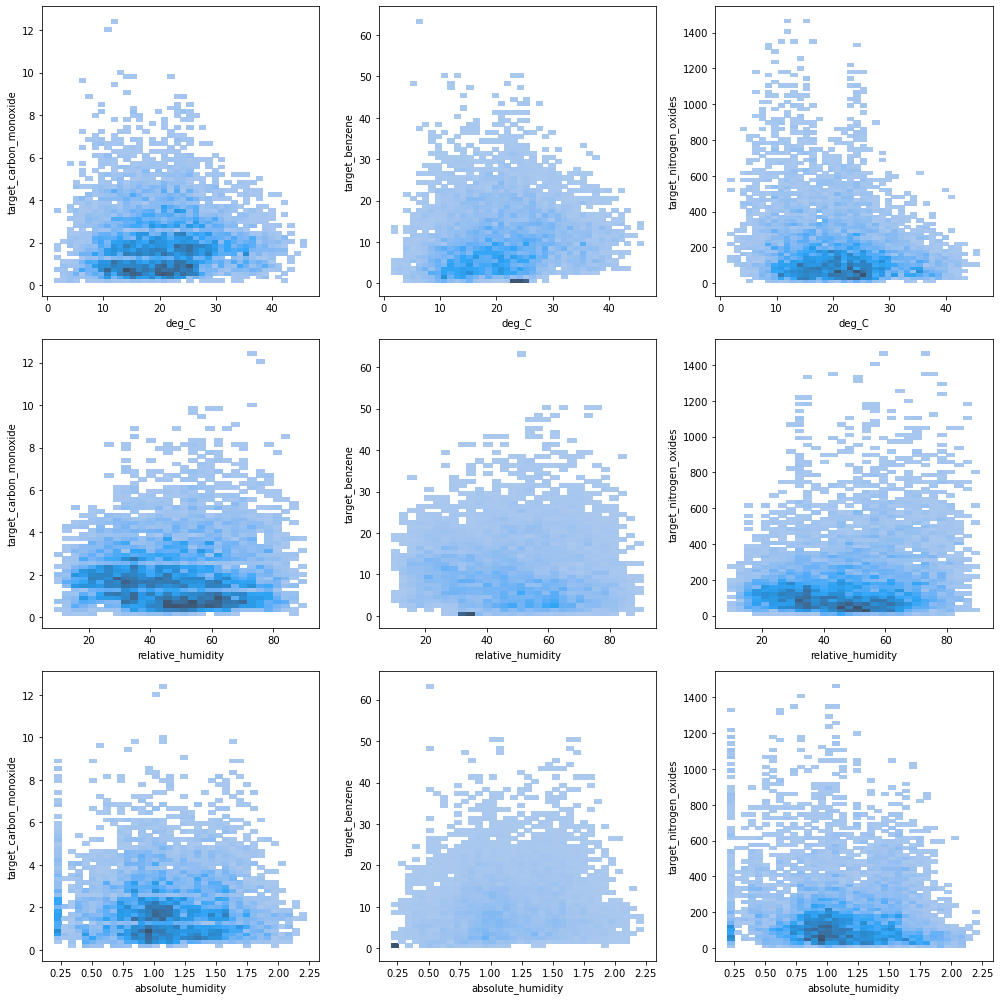

In [38]:
#Plot discrete values and its relationships with target values
fig, ax = plt.subplots(len(discrete_col), len(target_col),figsize=(14,14))

for row in range(len(discrete_col)):
    for col in range(len(target_col)):
        sns.histplot(x=discrete_col[row] ,y=target_col[col], data=train_ori ,ax=ax[row,col])
        plt.tight_layout()

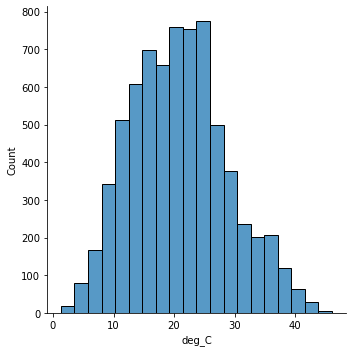

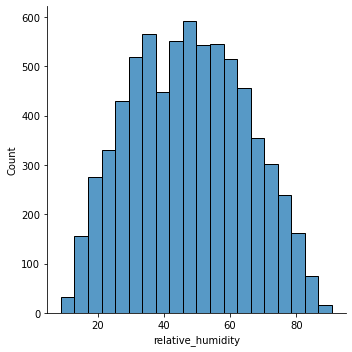

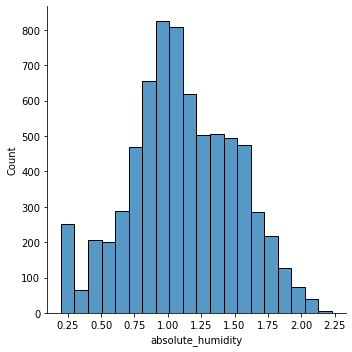

In [39]:
for row in range(len(discrete_col)):
    #plt.subplot(len(discrete_col),1,row+1)
    #plt.hist(train_ori[discrete_col[row]])
    sns.displot(train_ori[discrete_col[row]],bins=20)

<AxesSubplot:>

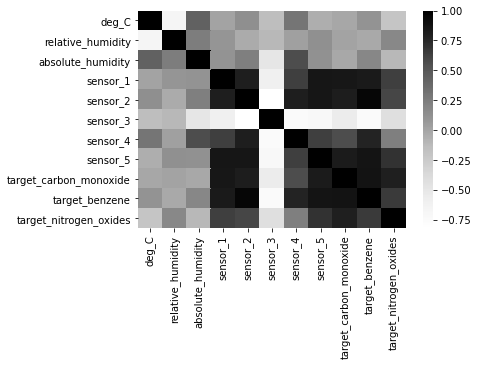

In [40]:
sns.heatmap(train_ori.corr(), cmap='Greys')

 Most of the features having 2nd degree linear relationship with all target variables, except sensor 3 which have logarithmic relationship

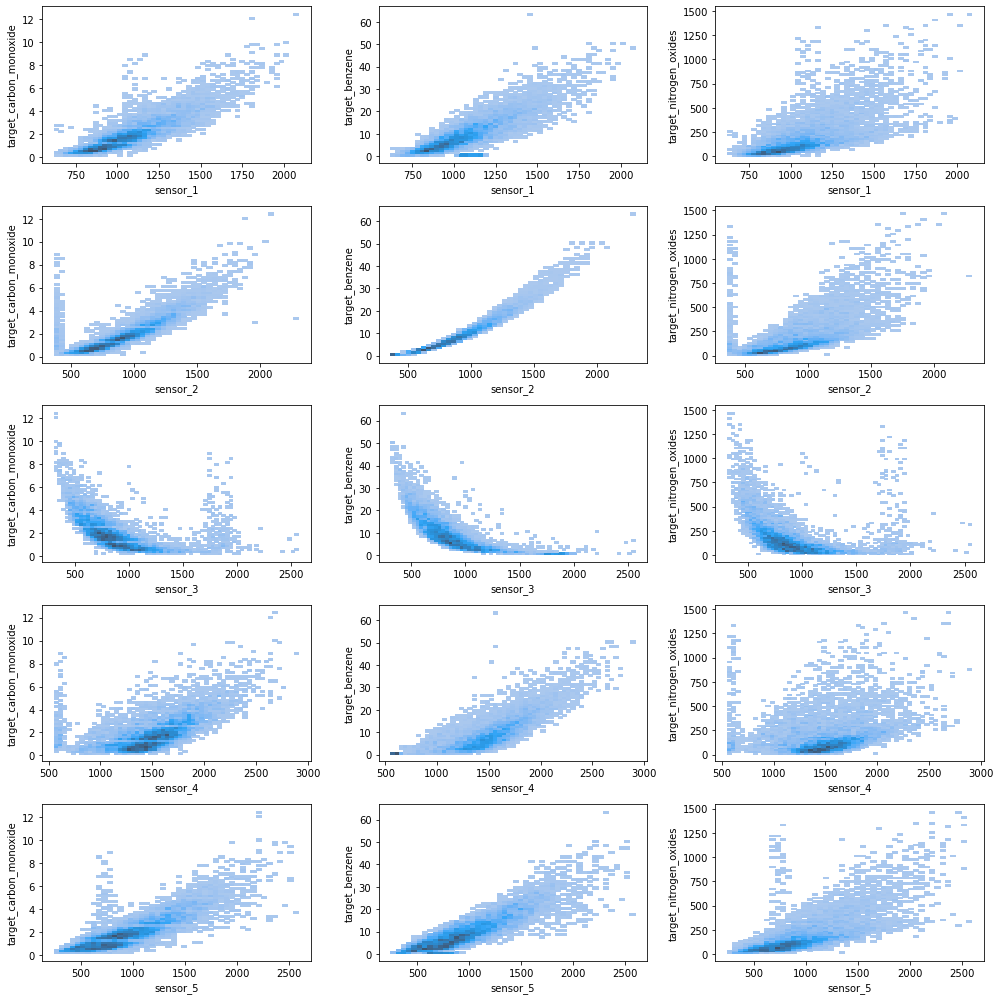

In [41]:
fig, ax = plt.subplots(len(continous_col), len(target_col),figsize=(14,14))

for row in range(len(continous_col)):
    for col in range(len(target_col)):
        sns.histplot(x=continous_col[row] ,y=target_col[col], data=train_ori ,ax=ax[row,col])
        plt.tight_layout()

# prediction using Random Forest Regressor with default parameters

In [49]:
#Using basic params
X = train_ori[feature_col]
y_co = train_ori[target_col[0]]
y_bz = train_ori[target_col[1]]
y_no = train_ori[target_col[2]]


In [50]:
# for Carbon Monoxide
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(X, y_co, test_size=0.25, random_state=0)
RF_co = RandomForestRegressor().fit(X_train_co, y_train_co)
y_predict_co = RF_co.predict(X_test_co)
score_co_basic = RF_co.score(X_test_co, y_test_co)
MSLE_co_RF_basic = mean_squared_log_error(y_test_co, y_predict_co)
print("Score for CO RandomForestRegressor basic:",score_co_basic)
print("MSLE for CO prediction:", MSLE_co_RF_basic)

Score for CO RandomForestRegressor basic: 0.8646741035367745
MSLE for CO prediction: 0.019359594531763107


In [52]:
# for Benzene
X_train_bz, X_test_bz, y_train_bz, y_test_bz = train_test_split(X, y_bz, test_size=0.25, random_state=0)
RF_bz = RandomForestRegressor().fit(X_train_bz, y_train_bz)
y_predict_bz = RF_bz.predict(X_test_bz)
score_bz_basic = RF_bz.score(X_test_bz, y_test_bz)
MSLE_bz_RF_basic = mean_squared_log_error(y_test_bz, y_predict_bz)
print("Score for Benzene RandomForestRegressor basic:",score_bz_basic)
print("MSLE for Benzene prediction:", MSLE_bz_RF_basic)


Score for Benzene RandomForestRegressor basic: 0.9742998748527407
MSLE for Benzene prediction: 0.00882290221993567


In [54]:
# for nitrogen monoxide
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X, y_no, test_size=0.25, random_state=0)
RF_no = RandomForestRegressor().fit(X_train_no, y_train_no)
y_predict_no = RF_no.predict(X_test_no)
score_no_basic = RF_no.score(X_test_no, y_test_no)
MSLE_no_RF_basic = mean_squared_log_error(y_test_no, y_predict_no)
print("Score for NO RandomForestRegressor basic:",score_no_basic)
print("MSLE for NO prediction:", MSLE_no_RF_basic)

Score for NO RandomForestRegressor basic: 0.8322494890565465
MSLE for NO prediction: 0.1096064573713794


In [55]:
y_realtest_co = RF_co.predict(test_ori.iloc[:,1:])
y_realtest_bz = RF_bz.predict(test_ori.iloc[:,1:])
y_realtest_no = RF_no.predict(test_ori.iloc[:,1:])

In [56]:
final = pd.DataFrame({'date_time': test_ori['date_time'].values, 
                     'target_carbon_monoxide': y_realtest_co, 
                     'target_benzene': y_realtest_bz, 
                     'target_nitrogen_oxides': y_realtest_no})

In [57]:
final

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.539,5.052,267.057
1,2011-01-01 01:00:00,2.144,7.625,290.650
2,2011-01-01 02:00:00,1.809,7.743,313.189
3,2011-01-01 03:00:00,1.963,8.562,346.893
4,2011-01-01 04:00:00,1.458,7.123,247.520
...,...,...,...,...
2242,2011-04-04 10:00:00,2.643,12.281,543.853
2243,2011-04-04 11:00:00,2.247,10.378,349.904
2244,2011-04-04 12:00:00,2.539,13.236,382.591
2245,2011-04-04 13:00:00,2.167,11.210,290.708


In [63]:
final.to_csv('submission.csv', index = False)

In [64]:
submission

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,2.0,10.0,300.0
1,2011-01-01 01:00:00,2.0,10.0,300.0
2,2011-01-01 02:00:00,2.0,10.0,300.0
3,2011-01-01 03:00:00,2.0,10.0,300.0
4,2011-01-01 04:00:00,2.0,10.0,300.0
...,...,...,...,...
2242,2011-04-04 10:00:00,2.0,10.0,300.0
2243,2011-04-04 11:00:00,2.0,10.0,300.0
2244,2011-04-04 12:00:00,2.0,10.0,300.0
2245,2011-04-04 13:00:00,2.0,10.0,300.0
